## Train Data

The aim of this project is to create and evaluate regression model for predicting the price of a house in Ames city at the time of sale. 

This notebook contains the data cleaning and processing of train data before building the model.

### Contents:
- [Data Import](#Data-Import)
- [Renaming Columns](#Renaming-Columns)
- [Data Cleaning](#Data-Cleaning)
    - [1. Imputing Null Values](#1.-Imputing-Null-Values)
    - [2. Checking Datatypes](#2.-Checking-Datatypes)
    - [3. Handling Ordinal Fields](#3.-Handling-Ordinal-Fields)
    - [4. Manipulating Fields](#4.-Manipulating-Fields)
    - [5. Removing Outliers](#5.-Removing-Outliers)
- [Exploratory Visualization](#Exploratory-Visualization)
- [Feature Preprocessing](#Feature-Preprocessing)
    -[One Hot Encoding](#One-Hot-Encoding)

In [510]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import datetime

from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

## Data Import

In [511]:
housing = pd.read_csv('../datasets/train.csv')

In [512]:
pd.set_option('display.max_columns', len(housing.columns))
pd.set_option('display.max_rows', len(housing))

In [513]:
housing.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [514]:
housing.shape

(2051, 81)

The train dataframe (housing) contains all the fields involved in deciding the selling price of the house along with the actual sale price.

## Renaming columns

In [515]:
housing.columns = housing.columns.map(lambda x: x.lower().replace(' ', '_'))
print(housing.columns)

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area',
       'street', 'alley', 'lot_shape', 'land_contour', 'utilities',
       'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod/add', 'roof_style',
       'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type',
       'mas_vnr_area', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1',
       'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       'heating', 'heating_qc', 'central_air', 'electrical', '1st_flr_sf',
       '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath',
       'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'fireplaces', 'fireplace_qu', 'garage_type', 'garage_yr_blt',
       'g

As we already have a unique column named id, we can use it as index.

In [516]:
housing.set_index('id', inplace = True)

## Data Cleaning

### 1) Imputing Null Values

In [517]:
housing.isnull().sum()

pid                   0
ms_subclass           0
ms_zoning             0
lot_frontage        330
lot_area              0
street                0
alley              1911
lot_shape             0
land_contour          0
utilities             0
lot_config            0
land_slope            0
neighborhood          0
condition_1           0
condition_2           0
bldg_type             0
house_style           0
overall_qual          0
overall_cond          0
year_built            0
year_remod/add        0
roof_style            0
roof_matl             0
exterior_1st          0
exterior_2nd          0
mas_vnr_type         22
mas_vnr_area         22
exter_qual            0
exter_cond            0
foundation            0
bsmt_qual            55
bsmt_cond            55
bsmt_exposure        58
bsmtfin_type_1       55
bsmtfin_sf_1          1
bsmtfin_type_2       56
bsmtfin_sf_2          1
bsmt_unf_sf           1
total_bsmt_sf         1
heating               0
heating_qc            0
central_air     

We can see above that there are null values for several columns that needs to be addressed.

In [518]:
housing[(housing['bsmt_exposure'].isnull()) & (housing['bsmt_qual'].notnull())]

,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1797,528458090,60,FV,81.0,10411,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,2Story,5,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,CBlock,Gd,TA,NaN,Unf,0.0,Unf,0.0,725.0,725.0,GasA,Ex,Y,SBrkr,725,863,0,1588,0.0,0.0,3,0,3,1,Gd,8,Typ,0,NaN,Attchd,2007.0,Unf,2.0,561.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2007,New,212109
67,528445060,20,RL,73.0,8987,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,226.0,Gd,TA,PConc,Gd,TA,NaN,Unf,0.0,Unf,0.0,1595.0,1595.0,GasA,Ex,Y,SBrkr,1595,0,0,1595,0.0,0.0,2,0,2,1,Gd,6,Typ,1,Gd,Attchd,2005.0,RFn,3.0,880.0,TA,TA,Y,144,0,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,221500
2780,907194130,60,RL,65.0,14006,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,144.0,Gd,TA,PConc,Gd,TA,NaN,Unf,0.0,Unf,0.0,936.0,936.0,GasA,Ex,Y,SBrkr,936,840,0,1776,0.0,0.0,2,1,3,1,Gd,7,Typ,1,TA,Attchd,2002.0,RFn,2.0,474.0,TA,TA,Y,144,96,0,0,0,0,NaN,NaN,NaN,0,2,2006,WD,192500


- There are 58 missing values for Bsmt Exposure. Out of which 55 have no basement but the other 3 have basement. So we will set 'No' for Bsmt Exposure for those 3 rows and NA(no basement) for the rest of the records.

In [519]:
housing.loc[(housing['bsmt_exposure'].isnull()) & (housing['bsmt_qual'].notnull()), 'bsmt_exposure'] = 'No'

- There is one row which has null value for BsmtFin Type 2 though there is a basement. We will assign it with the maximum occurring value.

In [520]:
housing.loc[(housing['bsmtfin_type_2'].isnull()) & (housing['bsmt_qual'].notnull()), 'bsmtfin_type_2'] = housing['bsmtfin_type_2'].mode()

- There is one record which has Garage Yr Built as null but there is a Garage in that house. The same record has null for garage cars and garage area. We will replace it with a median value.

In [521]:
housing.loc[(housing['garage_yr_blt'].isnull()) & (housing['garage_type'].notnull()), 'garage_yr_blt'] = housing['garage_yr_blt'].median()

- All the remaining null values for the columns indicate absense of their respective feature. Hence we will replace by either NA or 0 according to the type of the column.

Example : Set null values for bsmt_qual, bsmt_cond as 'NA' and total_bsmt_sf as 0.

In [522]:
housing.fillna(value={
    'lot_frontage' : housing['lot_frontage'].median(),
    'alley' : 'NA',
    'mas_vnr_type' : 'NA',
    'mas_vnr_area' : 0,
    'bsmt_qual' : 'NA',
    'bsmt_cond' : 'NA',
    'bsmt_exposure' : 'NA',
    'bsmtfin_type_1' : 'NA',
    'bsmtfin_sf_1' : 0,
    'bsmtfin_type_2' : 'NA',
    'bsmtfin_sf_2' : 0,
    'bsmt_unf_sf' : 0,
    'total_bsmt_sf': 0,
    'bsmt_full_bath' : 0,
    'bsmt_half_bath' : 0,
    'fireplace_qu' : 'NA', 
    'garage_type' : 'NA',
    'garage_finish' : 'NA',
    'garage_yr_blt' : 0,
    'garage_cars' : housing['garage_cars'].median(),
    'garage_area' : housing['garage_area'].median(),
    'garage_qual' : 'NA',
    'garage_cond' : 'NA',
    'pool_qc' : 'NA',
    'fence' : 'NA',
    'misc_feature' : 'NA'
}, inplace = True)

Confirm that there are no more null values

In [523]:
housing.isnull().sum()

pid                0
ms_subclass        0
ms_zoning          0
lot_frontage       0
lot_area           0
street             0
alley              0
lot_shape          0
land_contour       0
utilities          0
lot_config         0
land_slope         0
neighborhood       0
condition_1        0
condition_2        0
bldg_type          0
house_style        0
overall_qual       0
overall_cond       0
year_built         0
year_remod/add     0
roof_style         0
roof_matl          0
exterior_1st       0
exterior_2nd       0
mas_vnr_type       0
mas_vnr_area       0
exter_qual         0
exter_cond         0
foundation         0
bsmt_qual          0
bsmt_cond          0
bsmt_exposure      0
bsmtfin_type_1     0
bsmtfin_sf_1       0
bsmtfin_type_2     0
bsmtfin_sf_2       0
bsmt_unf_sf        0
total_bsmt_sf      0
heating            0
heating_qc         0
central_air        0
electrical         0
1st_flr_sf         0
2nd_flr_sf         0
low_qual_fin_sf    0
gr_liv_area        0
bsmt_full_bat

In [524]:
housing.head()

,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
109,533352170,60,RL,68.0,13517,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NA,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NA,NA,NA,0,3,2010,WD,130500
544,531379050,60,RL,43.0,11492,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NA,NA,NA,0,4,2009,WD,220000
153,535304180,20,RL,68.0,7922,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NA,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NA,NA,NA,0,1,2010,WD,109000
318,916386060,60,RL,73.0,9802,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NA,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NA,NA,NA,0,4,2010,WD,174000
255,906425045,50,RL,82.0,14235,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NA,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NA,NA,NA,0,3,2010,WD,138500


### 2) Checking Datatypes

In [525]:
housing.dtypes

pid                  int64
ms_subclass          int64
ms_zoning           object
lot_frontage       float64
lot_area             int64
street              object
alley               object
lot_shape           object
land_contour        object
utilities           object
lot_config          object
land_slope          object
neighborhood        object
condition_1         object
condition_2         object
bldg_type           object
house_style         object
overall_qual         int64
overall_cond         int64
year_built           int64
year_remod/add       int64
roof_style          object
roof_matl           object
exterior_1st        object
exterior_2nd        object
mas_vnr_type        object
mas_vnr_area       float64
exter_qual          object
exter_cond          object
foundation          object
bsmt_qual           object
bsmt_cond           object
bsmt_exposure       object
bsmtfin_type_1      object
bsmtfin_sf_1       float64
bsmtfin_type_2      object
bsmtfin_sf_2       float64
b

Pid and MS Subclass are nominal fields, so cannot keep it in numeric form. Converting it to string.

In [526]:
housing['ms_subclass'] = housing['ms_subclass'].astype('str')
housing['pid'] = housing['pid'].astype('str')

In [527]:
# We will maintain a list of numeric columns(only continous and discrete) for later data processing.
numeric_columns = housing.select_dtypes(include = ['int64', 'float64']).columns.to_list()

In [528]:
print('Numeric columns: ' + str(numeric_columns))

Numeric columns: ['lot_frontage', 'lot_area', 'overall_qual', 'overall_cond', 'year_built', 'year_remod/add', 'mas_vnr_area', 'bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf', '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath', 'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr', 'kitchen_abvgr', 'totrms_abvgrd', 'fireplaces', 'garage_yr_blt', 'garage_cars', 'garage_area', 'wood_deck_sf', 'open_porch_sf', 'enclosed_porch', '3ssn_porch', 'screen_porch', 'pool_area', 'misc_val', 'mo_sold', 'yr_sold', 'saleprice']


As overall_qual and overall_cond are ordinal fields we will remove it from the numeric columns list

In [529]:
numeric_columns.remove('overall_qual')
numeric_columns.remove('overall_cond')

### 3) Handling Ordinal Fields

Now if we look at the data, there are 23 ordinal fields. Ordinal fields have values like Excellent, Good, Average, etc. We will  convert them to numeric ranking so we can use it for modelling data.  

In [530]:
housing.replace({
    'lot_shape' : {'Reg':4, 'IR1':3, 'IR2':2, 'IR3':1},
    'utilities' : {'AllPub':4, 'NoSewr':3, 'NoSeWa':2, 'ELO':1},
    'land_slope' : {'Gtl':4, 'Mod':3, 'Sev':2},
    'exter_qual' : {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},
    'exter_cond' : {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},
    'bsmt_qual' : {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1 , 'NA': 0},
    'bsmt_cond' : {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1 , 'NA': 0},
    'bsmt_exposure' : {'Gd':4, 'Av':3, 'Mn':2, 'No':1, 'NA':0},
    'bsmtfin_type_1' : {'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1 , 'NA':0},
    'bsmtfin_type_2' : {'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1 , 'NA':0},
    'heating_qc' : {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA': 0},
    'electrical' : {'SBrkr':5, 'FuseA':4, 'FuseF':3, 'FuseP':2, 'Mix':1},
    'kitchen_qual' : {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},
    'functional' : {'Typ':7, 'Min1':6, 'Min2':5, 'Mod':4, 'Maj1':3, 'Maj2': 2, 'Sev':1 , 'Sal':0},
    'fireplace_qu' : {'Ex':5, 'Gd':4, 'TA':3,'Fa':2, 'Po':1, 'NA':0},
    'garage_finish' : {'Fin':3, 'RFn':2, 'Unf':1, 'NA':0},
    'garage_qual' : {'Ex':5, 'Gd':4, 'TA':3,'Fa':2, 'Po':1, 'NA':0},
    'garage_cond' : {'Ex':5, 'Gd':4, 'TA':3,'Fa':2, 'Po':1, 'NA':0},
    'paved_drive' : {'Y':3, 'P':2, 'N':1},
    'pool_qc' : {'Ex':4, 'Gd':3, 'TA':2, 'Fa':1, 'NA': 0},
    'fence' : {'GdPrv':4, 'MnPrv':3, 'GdWo':2, 'MnWw':1, 'NA':0}
}, inplace = True)

In [531]:
housing.head()

,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
109,533352170,60,RL,68.0,13517,Pave,NA,3,Lvl,4,CulDSac,4,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,4,3,CBlock,3,3,1,6,533.0,1,0.0,192.0,725.0,GasA,5,Y,5,725,754,0,1479,0.0,0.0,2,1,3,1,4,6,7,0,0,Attchd,1976.0,2,2.0,475.0,3,3,3,0,44,0,0,0,0,0,0,NA,0,3,2010,WD,130500
544,531379050,60,RL,43.0,11492,Pave,NA,3,Lvl,4,CulDSac,4,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,4,3,PConc,4,3,1,6,637.0,1,0.0,276.0,913.0,GasA,5,Y,5,913,1209,0,2122,1.0,0.0,2,1,4,1,4,8,7,1,3,Attchd,1997.0,2,2.0,559.0,3,3,3,0,74,0,0,0,0,0,0,NA,0,4,2009,WD,220000
153,535304180,20,RL,68.0,7922,Pave,NA,4,Lvl,4,Inside,4,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,4,CBlock,3,3,1,6,731.0,1,0.0,326.0,1057.0,GasA,3,Y,5,1057,0,0,1057,1.0,0.0,1,0,3,1,4,5,7,0,0,Detchd,1953.0,1,1.0,246.0,3,3,3,0,52,0,0,0,0,0,0,NA,0,1,2010,WD,109000
318,916386060,60,RL,73.0,9802,Pave,NA,4,Lvl,4,Inside,4,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,PConc,4,3,1,1,0.0,1,0.0,384.0,384.0,GasA,4,Y,5,744,700,0,1444,0.0,0.0,2,1,3,1,3,7,7,0,0,BuiltIn,2007.0,3,2.0,400.0,3,3,3,100,0,0,0,0,0,0,0,NA,0,4,2010,WD,174000
255,906425045,50,RL,82.0,14235,Pave,NA,3,Lvl,4,Inside,4,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,3,3,PConc,2,4,1,1,0.0,1,0.0,676.0,676.0,GasA,3,Y,5,831,614,0,1445,0.0,0.0,2,0,3,1,3,6,7,0,0,Detchd,1957.0,1,2.0,484.0,3,3,1,0,59,0,0,0,0,0,0,NA,0,3,2010,WD,138500


In [532]:
# We will maintain categorical fields for future feature processing.
nominal_columns = housing.select_dtypes(include = ['object']).columns.to_list()
# removing pid as we will not be using it.
nominal_columns.remove('pid')

### 4) Manipulating Fields

There is a field which contains the year when the house was built. 

Let's check the correlation between year_built and saleprice.

In [533]:
housing[['year_built','saleprice']].corr()

,year_built,saleprice
year_built,1.000000,0.571849
saleprice,0.571849,1.000000


From above the year_built have positive correlation to sale price. In normal practice as the age of house increases, the selling value of the house decreases. Let us now check the correlation of house age with sale price.

In [534]:
now = datetime.datetime.now()

In [535]:
housing['year_built'] = now.year - housing['year_built']
housing.rename(columns={'year_built': 'house_age'}, inplace = True)

In [536]:
housing[['house_age', 'saleprice']].corr()

,house_age,saleprice
house_age,1.000000,-0.571849
saleprice,-0.571849,1.000000


Now we can see that though the correlation is the same but it has negetive effect with sale price which will be more resourceful for predicting the sale price. 

In [537]:
# Maintaing numeric columns list
numeric_columns.append('house_age')
numeric_columns.remove('year_built')

### 5) Removing Outliers

In [538]:
def subplot_boxplot(dataframe, list_of_columns):
    nrows = int(np.ceil(len(list_of_columns)/4))
    fig, ax = plt.subplots(nrows=nrows, ncols=4, figsize=(18,40))
    ax = ax.ravel() 
    
    for i, column in enumerate(list_of_columns): 
        ax[i].boxplot(x = column, data = housing, 
                      patch_artist = True, 
                      notch ='True')
        title = f'Distribution of {list_of_columns[i]}'
        ax[i].set(title=title, xlabel= list_of_columns[i], ylabel = '')
        
    fig.tight_layout(pad=2)

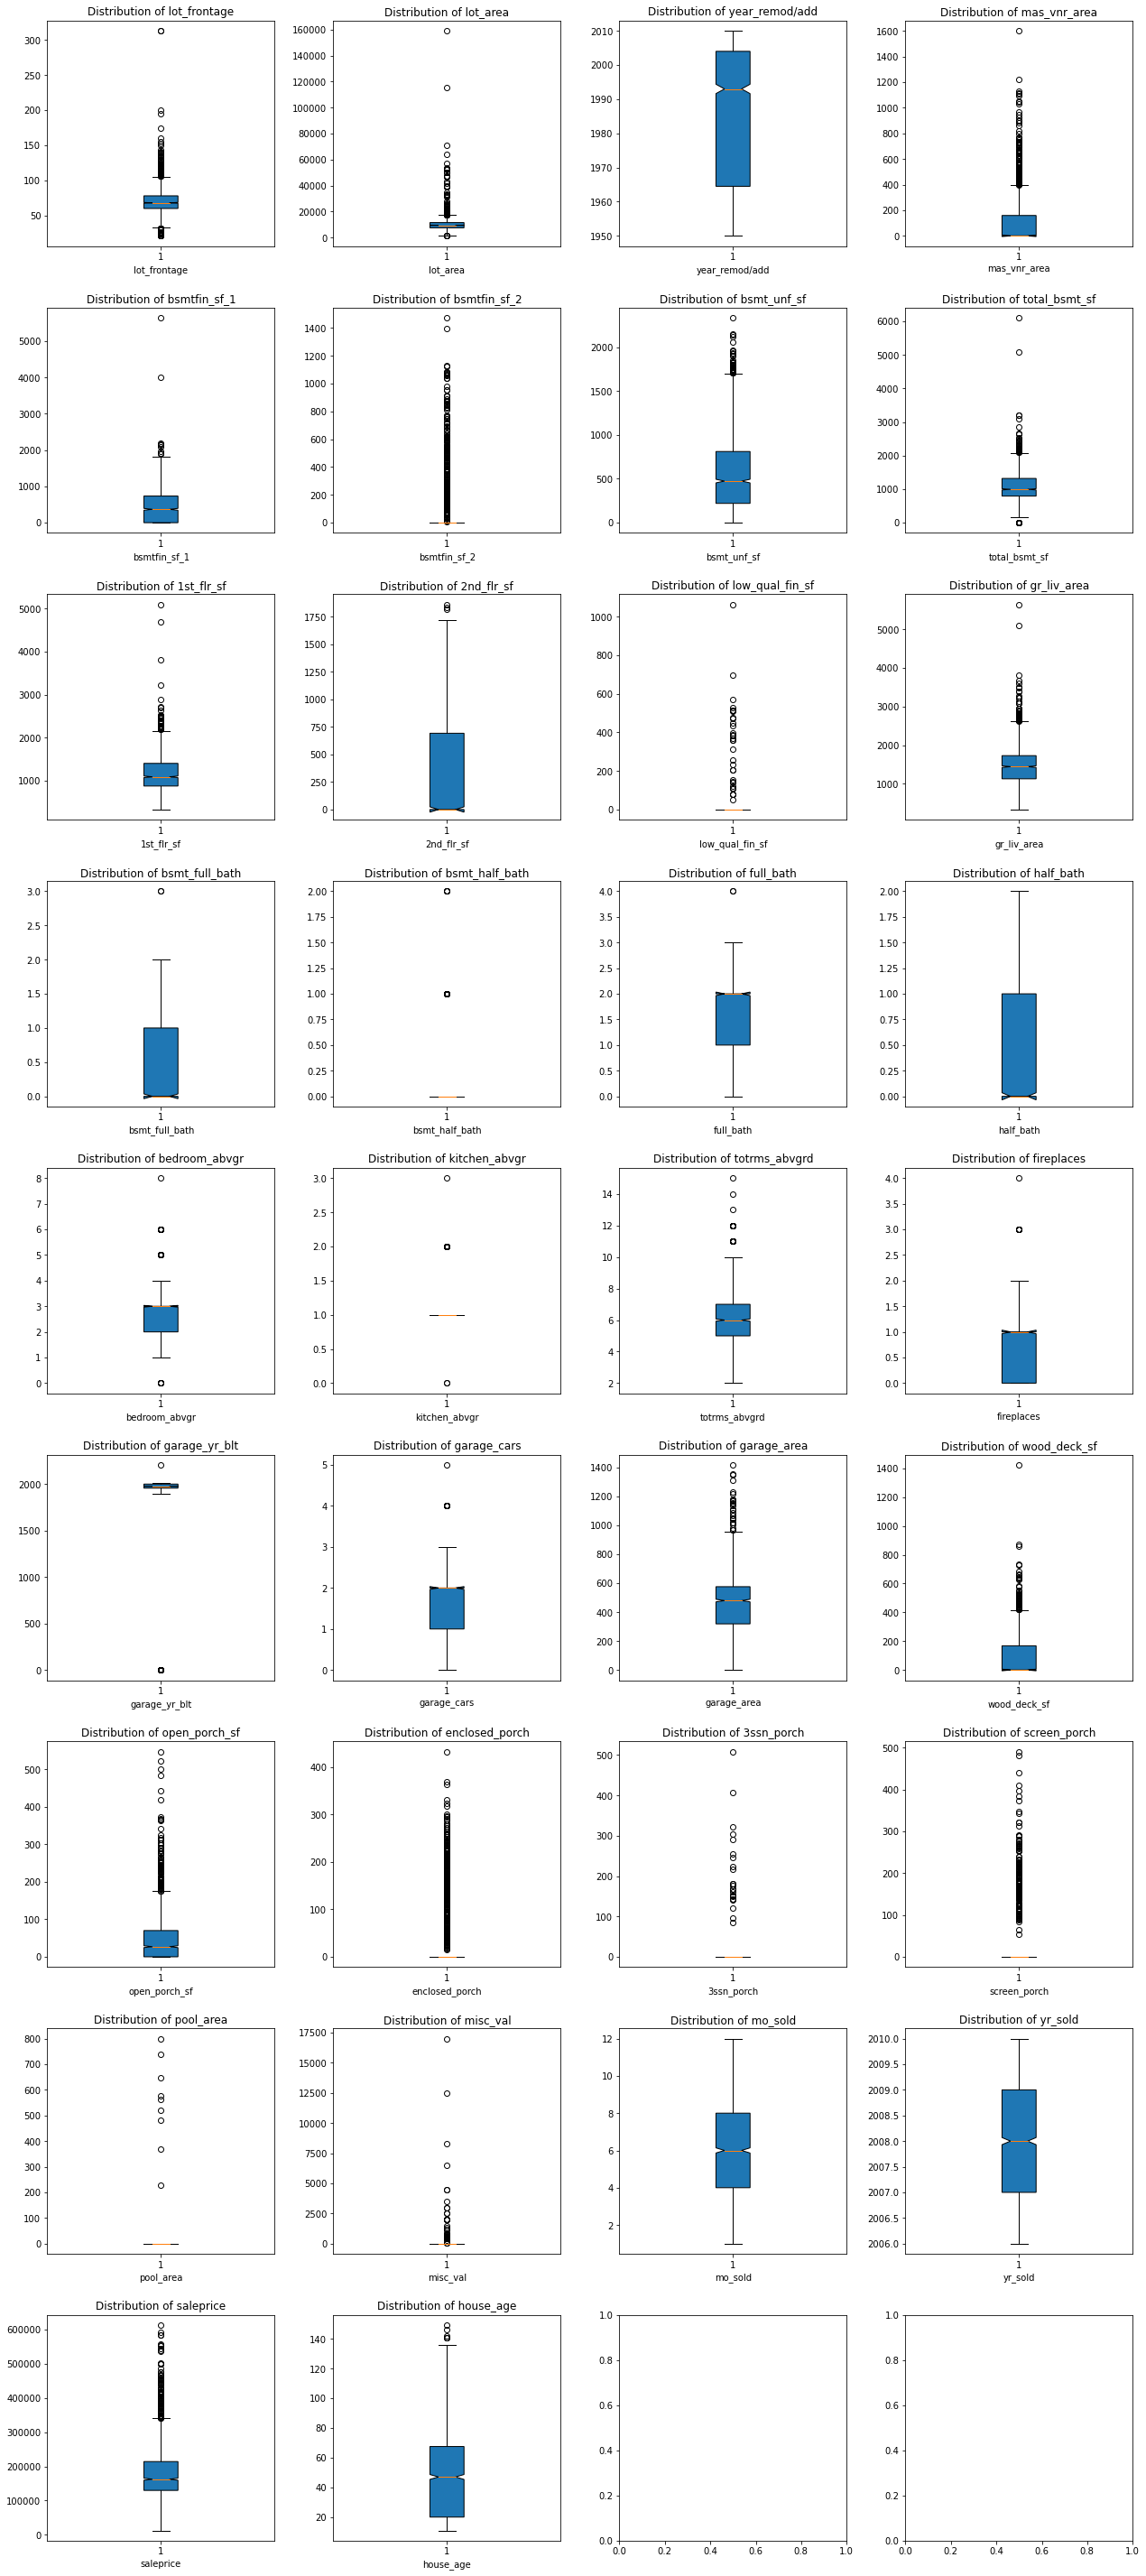

In [539]:
subplot_boxplot(housing, numeric_columns)

Removing outliers improve the correlation among the fields, hence we will remove the prominent ones as seen from the box plots above.

Correlation matric before removing outliers.

In [540]:
housing[numeric_columns].corr()

,lot_frontage,lot_area,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_yr_blt,garage_cars,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice,house_age
lot_frontage,1.000000,0.386708,0.079909,0.197858,0.196043,0.032092,0.119105,0.330540,0.428067,0.011729,-0.000007,0.349084,0.098880,-0.028852,0.138012,0.031167,0.199834,0.014849,0.331864,0.223271,0.087335,0.278739,0.337745,0.100071,0.169950,-0.002764,0.028342,0.067850,0.141315,0.048216,-0.015915,0.008450,0.325129,-0.103534
lot_area,0.386708,1.000000,0.050771,0.167520,0.215648,0.041799,0.041544,0.277478,0.381593,0.029398,0.001273,0.327427,0.113283,0.029157,0.125601,0.049995,0.139060,-0.013484,0.238724,0.289467,0.086118,0.214927,0.263292,0.155623,0.140864,0.014139,0.019553,0.067714,0.115102,0.093922,0.003197,-0.029454,0.296566,-0.036002
year_remod/add,0.079909,0.050771,1.000000,0.204234,0.167296,-0.056894,0.160910,0.309795,0.244190,0.159605,-0.066577,0.322407,0.153771,-0.037763,0.471555,0.224106,-0.019748,-0.135926,0.202397,0.138858,0.166598,0.441834,0.398961,0.216271,0.264476,-0.237523,0.040416,-0.041211,-0.022382,-0.001704,0.011568,0.042744,0.550370,-0.629116
mas_vnr_area,0.197858,0.167520,0.204234,1.000000,0.318761,-0.015346,0.083393,0.403618,0.386482,0.098692,-0.061104,0.383875,0.147129,0.011885,0.232474,0.186871,0.054786,-0.070255,0.271657,0.265911,0.126524,0.356430,0.380396,0.164006,0.157836,-0.105934,0.011771,0.088207,0.012789,0.079630,-0.003915,-0.017324,0.503579,-0.320780
bsmtfin_sf_1,0.196043,0.215648,0.167296,0.318761,1.000000,-0.050101,-0.472598,0.539251,0.462360,-0.167591,-0.078294,0.215735,0.645697,0.077699,0.075437,-0.006393,-0.120225,-0.096279,0.056657,0.298810,0.132564,0.261051,0.331890,0.214540,0.140570,-0.076766,0.047756,0.093338,0.075938,0.130054,-0.010151,0.037890,0.423856,-0.275728
bsmtfin_sf_2,0.032092,0.041799,-0.056894,-0.015346,-0.050101,1.000000,-0.231053,0.086760,0.095758,-0.087380,-0.002749,0.001254,0.157182,0.093973,-0.073973,-0.016366,-0.043137,-0.036385,-0.047183,0.068091,0.047988,-0.002025,0.013310,0.105924,-0.004280,0.004594,-0.024210,0.096442,0.061033,-0.005502,-0.013828,-0.000037,0.016432,0.020906
bsmt_unf_sf,0.119105,0.041544,0.160910,0.083393,-0.472598,-0.231053,1.000000,0.419969,0.302567,-0.012439,0.059618,0.235192,-0.401613,-0.109324,0.279102,-0.042075,0.191338,0.063019,0.256797,0.002396,0.005494,0.168329,0.145533,-0.033965,0.116402,-0.010608,0.020464,-0.055356,-0.039154,-0.005829,0.020536,-0.043772,0.190861,-0.137114
total_bsmt_sf,0.330540,0.277478,0.309795,0.403618,0.539251,0.086760,0.419969,1.000000,0.808351,-0.216139,-0.022295,0.454245,0.322276,0.005967,0.326277,-0.054173,0.050203,-0.049700,0.294787,0.333643,0.158920,0.433359,0.489049,0.225164,0.257666,-0.087500,0.060320,0.076286,0.061493,0.125534,0.004837,-0.004470,0.629303,-0.410605
1st_flr_sf,0.428067,0.381593,0.244190,0.386482,0.462360,0.095758,0.302567,0.808351,1.000000,-0.268855,-0.010399,0.562441,0.264048,0.007857,0.367623,-0.112193,0.090768,0.073033,0.393254,0.394729,0.152582,0.438858,0.498666,0.226243,0.259072,-0.044032,0.066991,0.089140,0.129995,0.139496,0.027038,-0.007432,0.618486,-0.323315
2nd_flr_sf,0.011729,0.029398,0.159605,0.098692,-0.167591,-0.087380,-0.012439,-0.216139,-0.268855,1.000000,0.014645,0.639092,-0.163376,-0.068154,0.383072,0.614656,0.503394,0.045300,0.575327,0.171873,0.046508,0.173107,0.121254,0.109070,0.165080,0.021083,-0.033167,0.035105,0.012642,0.004413,0.030248,-0.011915,0.248452,-0.022313


1) Removing the outliers for Lot Frontage which has value greater than 300.

In [541]:
housing[housing['lot_frontage'] > 300]

,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,house_age,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1499,908154235,60,RL,313.0,63887,Pave,NA,1,Bnk,4,Corner,4,Edwards,Feedr,Norm,1Fam,2Story,10,5,13,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,5,3,PConc,5,3,4,6,5644.0,1,0.0,466.0,6110.0,GasA,5,Y,5,4692,950,0,5642,2.0,0.0,2,1,3,1,5,12,7,3,4,Attchd,2008.0,3,2.0,1418.0,3,3,3,214,292,0,0,0,480,3,0,NA,0,1,2008,New,160000
1266,535427070,20,RL,313.0,27650,Pave,NA,2,HLS,4,Inside,3,NAmes,PosA,Norm,1Fam,1Story,7,7,61,2007,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,3,3,CBlock,4,3,4,6,425.0,1,0.0,160.0,585.0,GasA,5,Y,5,2069,0,0,2069,1.0,0.0,2,0,4,1,4,9,7,1,4,Attchd,1960.0,2,2.0,505.0,3,3,3,0,0,0,0,0,0,0,0,NA,0,11,2008,WD,242000


In [542]:
housing.drop(housing[housing['lot_frontage'] > 300].index, inplace = True)

2) Removing outliers for Lot Area whose value is greater than 100000.

In [543]:
housing[housing['lot_area'] > 100000]

,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,house_age,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2116,906426060,50,RL,68.0,159000,Pave,NA,2,Low,4,CulDSac,2,ClearCr,Norm,Norm,1Fam,1.5Fin,6,7,63,2006,Gable,CompShg,Wd Sdng,HdBoard,BrkCmn,472.0,4,3,CBlock,4,3,4,3,697.0,1,0.0,747.0,1444.0,GasA,4,Y,5,1444,700,0,2144,0.0,1.0,2,0,4,1,4,7,7,2,3,Attchd,1958.0,3,2.0,389.0,3,3,3,0,98,0,0,0,0,0,0,Shed,500,6,2007,WD,277000
2072,905301050,20,RL,68.0,115149,Pave,NA,2,Low,4,CulDSac,2,ClearCr,Norm,Norm,1Fam,1Story,7,5,50,2002,Gable,CompShg,Plywood,Plywood,Stone,351.0,3,3,CBlock,4,3,4,6,1219.0,1,0.0,424.0,1643.0,GasA,3,Y,5,1824,0,0,1824,1.0,0.0,2,0,2,1,4,5,7,2,3,Attchd,1971.0,1,2.0,739.0,3,3,3,380,48,0,0,0,0,0,0,NA,0,6,2007,WD,302000


In [544]:
housing.drop(housing[housing['lot_area'] > 100000].index, inplace = True)

3) Removing outliers for Mas Vnr Area which has value greater than 1400.

In [545]:
housing[housing['mas_vnr_area'] > 1400]

,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,house_age,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1850,533241030,60,FV,66.0,7399,Pave,Pave,3,Lvl,4,Inside,4,Somerst,Norm,Norm,1Fam,2Story,7,5,24,1998,Hip,CompShg,VinylSd,VinylSd,BrkFace,1600.0,4,3,PConc,4,3,1,4,649.0,1,0.0,326.0,975.0,GasA,5,Y,5,975,975,0,1950,0.0,0.0,2,1,3,1,4,7,7,1,3,Detchd,1997.0,2,2.0,576.0,3,3,3,0,10,0,0,198,0,0,0,NA,0,6,2007,WD,239000


In [546]:
housing.drop(housing[housing['mas_vnr_area'] > 1400].index, inplace = True)

4) Removing outliers for Ground Liv Area which has value greater than 4000. There were more than 1 outlier for Grounf Liv Area but only 1 is remaining as the other was removed while handling the outliers above.

In [547]:
housing[housing['gr_liv_area'] > 4000]

,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,house_age,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2181,908154195,20,RL,128.0,39290,Pave,NA,3,Bnk,4,Inside,4,Edwards,Norm,Norm,1Fam,1Story,10,5,13,2009,Hip,CompShg,CemntBd,CmentBd,Stone,1224.0,5,3,PConc,5,3,4,6,4010.0,1,0.0,1085.0,5095.0,GasA,5,Y,5,5095,0,0,5095,1.0,1.0,2,1,2,1,5,15,7,2,4,Attchd,2008.0,3,3.0,1154.0,3,3,3,546,484,0,0,0,0,0,0,Elev,17000,10,2007,New,183850


In [548]:
housing.drop(housing[housing['gr_liv_area'] > 4000].index, inplace = True)

5) Outliers for Bsmt SF 1 and 1st Floor SF were also removed while handling the outliers above

In [549]:
housing[housing['bsmtfin_sf_1'] > 3500]

,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,house_age,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [550]:
housing[housing['1st_flr_sf'] > 4000]

,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,house_age,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


Now as we compare the correlation again, we can see that it has been improves after removing outliers.

Eg: 

Correlation for Gr Liv Area and Sale Price before : 0.697261

Correlation for Gr Liv Area and Sale Price after  : 0.719288

In [551]:
housing[numeric_columns].corr()

,lot_frontage,lot_area,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_yr_blt,garage_cars,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice,house_age
lot_frontage,1.000000,0.446586,0.070917,0.189473,0.138278,0.038336,0.133064,0.296193,0.396317,0.009724,0.001436,0.317539,0.080102,-0.033566,0.137959,0.028633,0.206760,0.018673,0.320594,0.211569,0.090290,0.293573,0.333347,0.101514,0.157361,0.002077,0.031794,0.077091,0.079403,0.012828,-0.018175,0.007826,0.346470,-0.104627
lot_area,0.446586,1.000000,0.032261,0.142253,0.185119,0.063593,0.050600,0.268193,0.409808,0.029909,0.005206,0.346135,0.127175,-0.020473,0.136985,0.074043,0.170007,-0.010672,0.279897,0.297634,0.103688,0.264612,0.304961,0.176830,0.137934,0.030716,0.028648,0.098025,0.090269,0.040533,0.008958,-0.023663,0.351973,-0.044581
year_remod/add,0.070917,0.032261,1.000000,0.201382,0.163507,-0.056141,0.161305,0.315098,0.243105,0.159554,-0.066363,0.322270,0.151859,-0.041687,0.470428,0.224040,-0.020414,-0.135542,0.199040,0.134091,0.166127,0.441209,0.397789,0.215155,0.262957,-0.236829,0.040776,-0.041653,-0.030487,-0.025110,0.011042,0.043716,0.550104,-0.629475
mas_vnr_area,0.189473,0.142253,0.201382,1.000000,0.292131,-0.012643,0.085001,0.384870,0.367724,0.094752,-0.062082,0.363065,0.147162,-0.002194,0.232373,0.182866,0.058580,-0.070482,0.258340,0.255787,0.127894,0.361894,0.375182,0.159385,0.138074,-0.105521,0.013342,0.079750,-0.012279,-0.018924,-0.003725,-0.012660,0.517281,-0.322947
bsmtfin_sf_1,0.138278,0.185119,0.163507,0.292131,1.000000,-0.049379,-0.499595,0.490163,0.412385,-0.181591,-0.081010,0.153759,0.657980,0.067936,0.070706,-0.018430,-0.123009,-0.098824,0.017926,0.282543,0.135912,0.265859,0.311996,0.205342,0.101818,-0.076424,0.051289,0.100653,0.007267,0.025975,-0.005002,0.041983,0.445213,-0.278011
bsmtfin_sf_2,0.038336,0.063593,-0.056141,-0.012643,-0.049379,1.000000,-0.231303,0.094771,0.103874,-0.087323,-0.002842,0.004145,0.158407,0.095554,-0.073390,-0.016173,-0.043045,-0.036566,-0.046226,0.070271,0.048214,-0.001591,0.014701,0.107094,-0.002945,0.004273,-0.024301,0.096946,0.065395,-0.001638,-0.013719,-0.000325,0.017019,0.020591
bsmt_unf_sf,0.133064,0.050600,0.161305,0.085001,-0.499595,-0.231303,1.000000,0.439078,0.313760,-0.012104,0.059637,0.240202,-0.402947,-0.113268,0.279702,-0.042712,0.192594,0.063022,0.257824,0.001949,0.005520,0.167888,0.145900,-0.036081,0.114179,-0.010699,0.020456,-0.054681,-0.039345,-0.030181,0.020359,-0.043519,0.191713,-0.136925
total_bsmt_sf,0.296193,0.268193,0.315098,0.384870,0.490163,0.094771,0.439078,1.000000,0.792600,-0.233571,-0.022358,0.410710,0.318948,-0.011197,0.336328,-0.069823,0.057536,-0.050237,0.269616,0.320415,0.164488,0.448561,0.479471,0.215421,0.222935,-0.088272,0.064798,0.084194,-0.008257,-0.005358,0.010780,-0.002270,0.665464,-0.421423
1st_flr_sf,0.396317,0.409808,0.243105,0.367724,0.412385,0.103874,0.313760,0.792600,1.000000,-0.283569,-0.009634,0.529881,0.256411,-0.010501,0.376824,-0.127891,0.098430,0.079015,0.371396,0.385102,0.156670,0.450525,0.489825,0.215251,0.225433,-0.041742,0.071474,0.097960,0.082465,-0.004635,0.028127,-0.005192,0.648083,-0.328672
2nd_flr_sf,0.009724,0.029909,0.159554,0.094752,-0.181591,-0.087323,-0.012104,-0.233571,-0.283569,1.000000,0.014751,0.656712,-0.164166,-0.068745,0.383485,0.615067,0.503887,0.045533,0.582364,0.171217,0.046357,0.173806,0.120785,0.111877,0.167419,0.021405,-0.033148,0.032904,0.003806,0.020226,0.032965,-0.011753,0.249193,-0.021386


## Exploratory Visualizations & Feature Engineering

In [552]:
housing.head()

,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,house_age,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
109,533352170,60,RL,68.0,13517,Pave,NA,3,Lvl,4,CulDSac,4,Sawyer,RRAe,Norm,1Fam,2Story,6,8,45,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,4,3,CBlock,3,3,1,6,533.0,1,0.0,192.0,725.0,GasA,5,Y,5,725,754,0,1479,0.0,0.0,2,1,3,1,4,6,7,0,0,Attchd,1976.0,2,2.0,475.0,3,3,3,0,44,0,0,0,0,0,0,NA,0,3,2010,WD,130500
544,531379050,60,RL,43.0,11492,Pave,NA,3,Lvl,4,CulDSac,4,SawyerW,Norm,Norm,1Fam,2Story,7,5,25,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,4,3,PConc,4,3,1,6,637.0,1,0.0,276.0,913.0,GasA,5,Y,5,913,1209,0,2122,1.0,0.0,2,1,4,1,4,8,7,1,3,Attchd,1997.0,2,2.0,559.0,3,3,3,0,74,0,0,0,0,0,0,NA,0,4,2009,WD,220000
153,535304180,20,RL,68.0,7922,Pave,NA,4,Lvl,4,Inside,4,NAmes,Norm,Norm,1Fam,1Story,5,7,68,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,4,CBlock,3,3,1,6,731.0,1,0.0,326.0,1057.0,GasA,3,Y,5,1057,0,0,1057,1.0,0.0,1,0,3,1,4,5,7,0,0,Detchd,1953.0,1,1.0,246.0,3,3,3,0,52,0,0,0,0,0,0,NA,0,1,2010,WD,109000
318,916386060,60,RL,73.0,9802,Pave,NA,4,Lvl,4,Inside,4,Timber,Norm,Norm,1Fam,2Story,5,5,15,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,PConc,4,3,1,1,0.0,1,0.0,384.0,384.0,GasA,4,Y,5,744,700,0,1444,0.0,0.0,2,1,3,1,3,7,7,0,0,BuiltIn,2007.0,3,2.0,400.0,3,3,3,100,0,0,0,0,0,0,0,NA,0,4,2010,WD,174000
255,906425045,50,RL,82.0,14235,Pave,NA,3,Lvl,4,Inside,4,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,121,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,3,3,PConc,2,4,1,1,0.0,1,0.0,676.0,676.0,GasA,3,Y,5,831,614,0,1445,0.0,0.0,2,0,3,1,3,6,7,0,0,Detchd,1957.0,1,2.0,484.0,3,3,1,0,59,0,0,0,0,0,0,NA,0,3,2010,WD,138500


pid is Parcel identification number which can be used with city web site for parcel review.
As it is not a potential feature for predicting Sale Price we will drop it.

In [553]:
housing.drop(['pid'], axis = 1, inplace = True)

Let's understand the linearity between the numeric features and the Sale price through scatter plot.

In [554]:
def subplot_scatter(dataframe, list_of_columns):
    nrows = int(np.ceil(len(list_of_columns)/4))
    fig, ax = plt.subplots(nrows=nrows, ncols=4, figsize=(16,30))
    ax = ax.ravel() 
    
    for i, column in enumerate(list_of_columns): 
        ax[i].scatter(dataframe[column], dataframe['saleprice'], color = 'royalblue')
        title = f'Sale Price VS {list_of_columns[i]}'
        ax[i].set(title=title, xlabel= list_of_columns[i], ylabel = 'sale price')
        
    fig.tight_layout(pad=2)

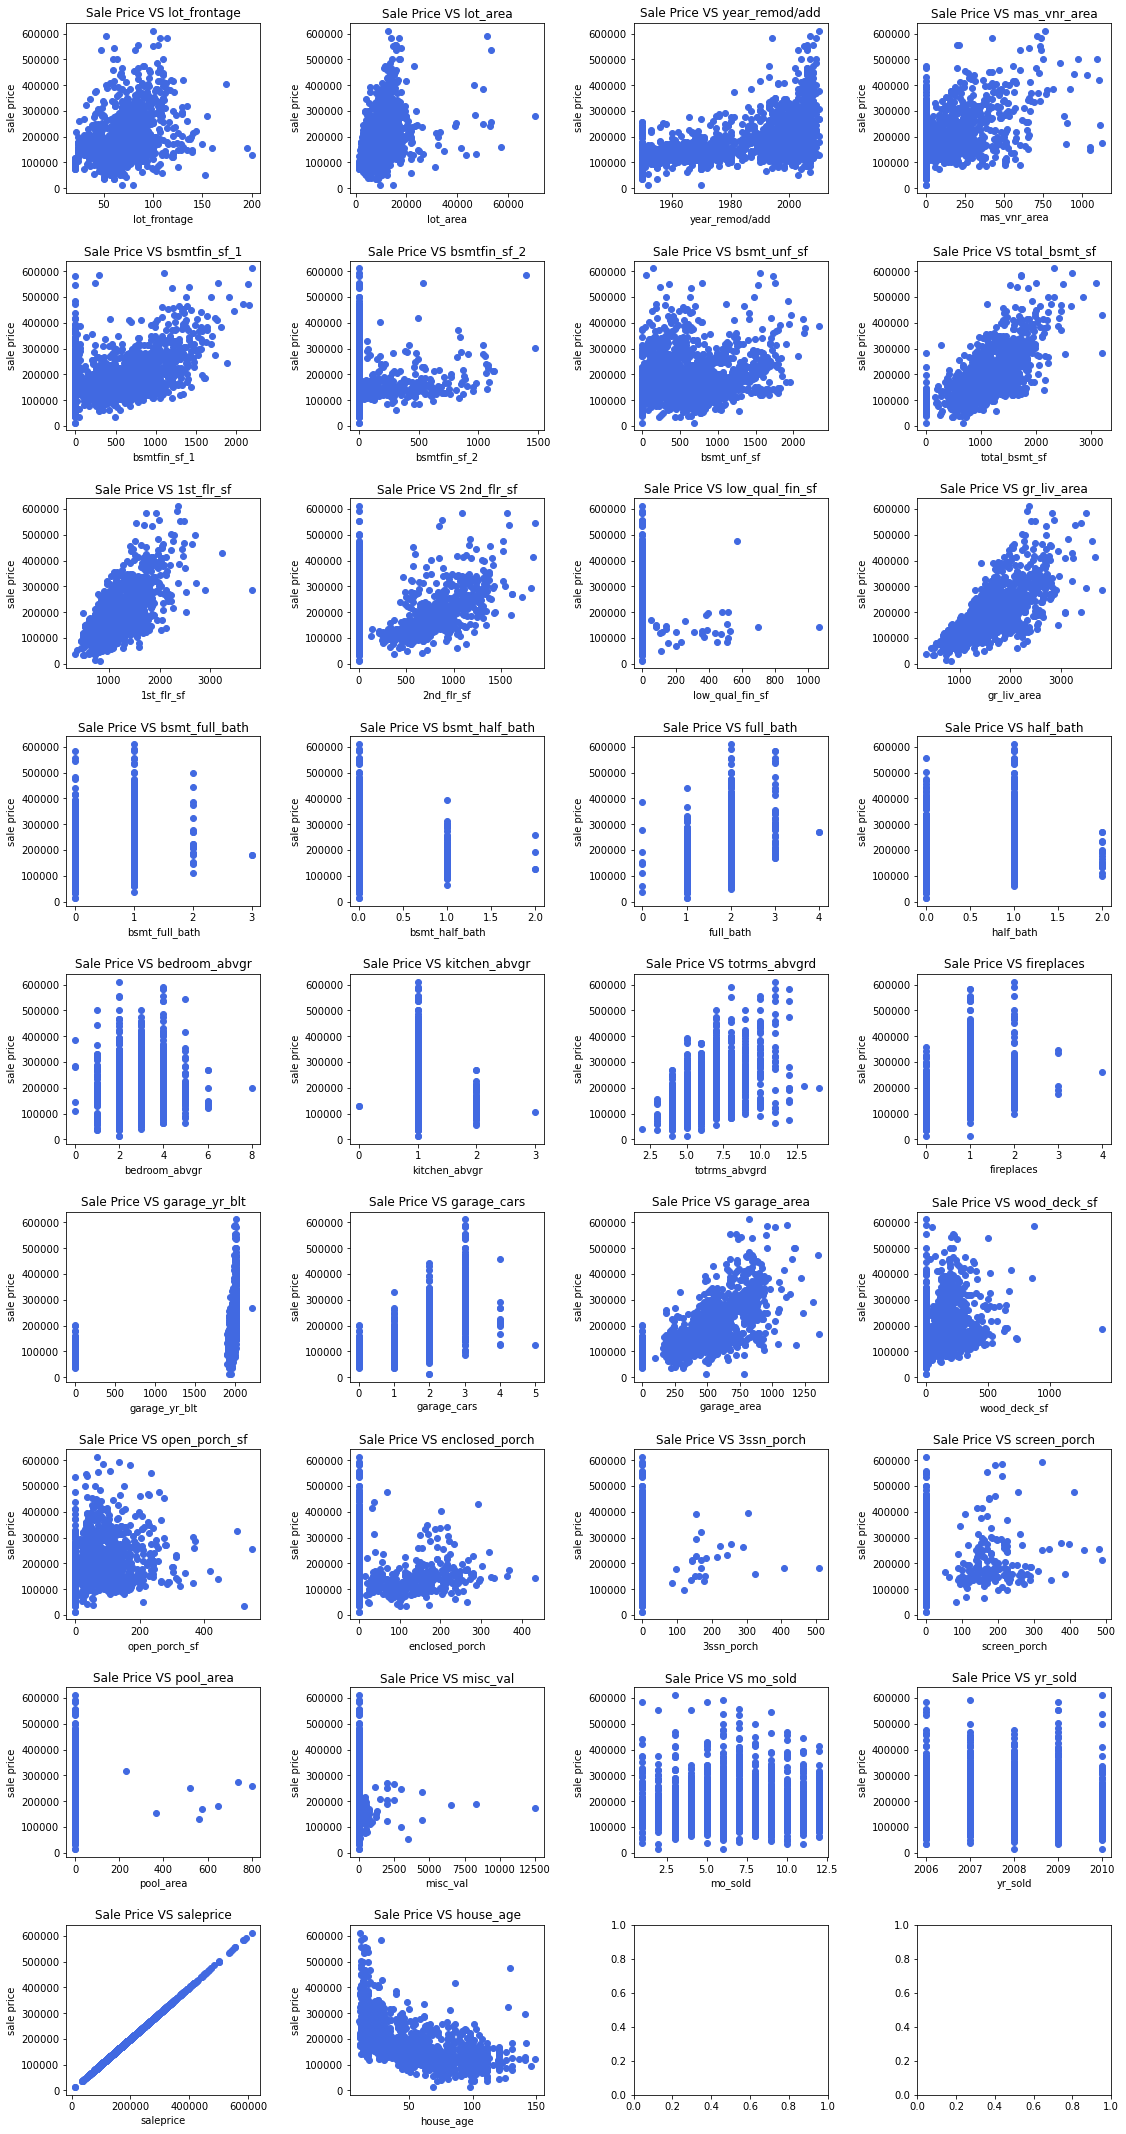

In [555]:
subplot_scatter(housing, numeric_columns)

- From the graphs above, we can say that gr_liv_area and 1st_flr_sf have a clear linear relationship with saleprice as compared to any other field.
- Fields like low_qual_fin_sf, 3ssn_porch, pool_area and misc_val has very skewed data. For example there are only 8 houses which have pool and so the pool_area have maximum 0 values and only 8 with non zero values. 
- Fields like total_bsmt_sf, 2nd_flr_sf, garage_area, screen_porch also have linear relation with sale price if we account for values which are not 0(absence of feature).
- Other fields like bsmt_full_bath, bsmt_half_bath, bedroom_abvgr, totrms_abvgr, fireplaces, garage_cars, etc represents number of features for their respective fields. Example : No of baths , number of rooms, no of fireplaces. Hence , cannot describe the linearity with sale price.
- Also we can see that house age (the column we added previously) has negetive linear relationship with saleprice.

Now, we will see the correlation of various fields with SalePrice which will help us to eliminate few of the very low correlated fields.

In [556]:
def corr_heatmap(start, stop):
    '''
    Plots heatmap by using the columns mentioned by start and stop variables.
    '''
    plt.figure(figsize=(9,9))

    cor = housing.iloc[:, np.r_[start:stop, -1]].corr()

    mask = np.zeros_like(cor, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    
    sns.heatmap(cor, annot=True, mask = mask, cmap='coolwarm')

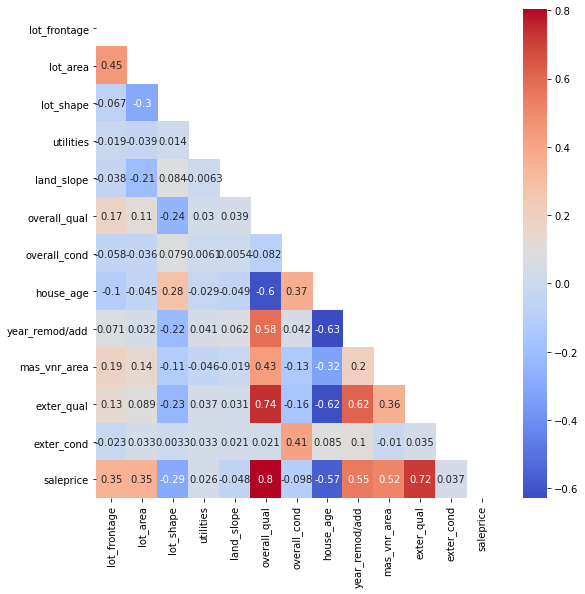

In [557]:
corr_heatmap(1, 29)

- overall_qual, house_age, year_remod/add, mas_vnr_area, exter_qual have correlation greater than 0.5 with sale price.
- Now house_age and year_remod/add are highly correlated so we will avoid both features together while modelling the data.
- Moreover, house_age and exter_qual are also correlated but the factor of maintenance over the years might include both the features.

In [558]:
housing['utilities'].value_counts()

4    2043
3       1
2       1
Name: utilities, dtype: int64

- The correlation between utilities and sale price is very low at 0.013. This is due to it's skewed distribution. All the rows have same value except 2. So this field will not be helpful for determining sale price hence we will drop it.

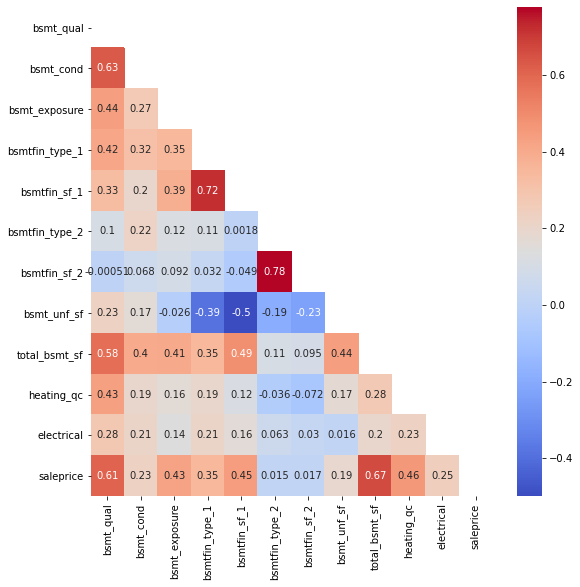

In [559]:
corr_heatmap(29, 42)

- bsmt_qual, total_bsmt_sf have are hight correlated to sale price. Also they are both mutually correlated.

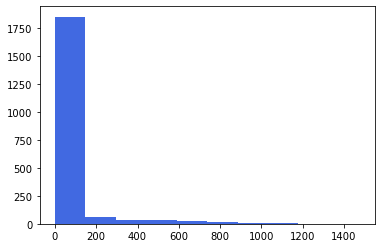

In [560]:
plt.hist(housing['bsmtfin_sf_2'], color='royalblue');

- Similar as utilities, bsmt_sf_2 has really low correlation of 0.0079 with sale price and as shown above it's distribution is very skewed. So we will drop bsmt_sf_2 column as well as it will not be a reliable predictor variable .

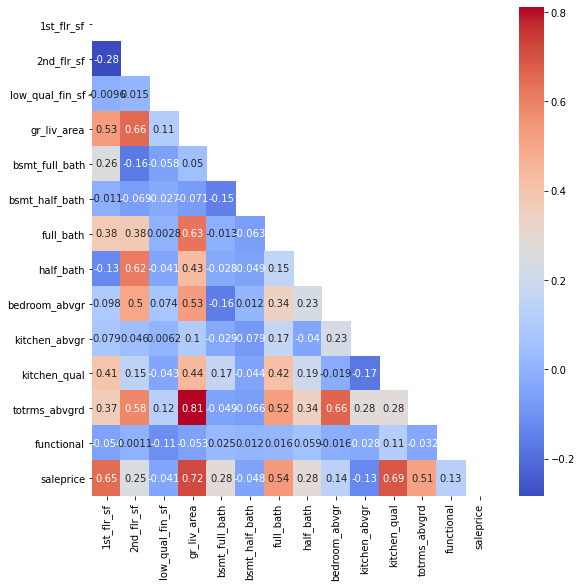

In [561]:
corr_heatmap(42, 55)

- 1st_flr_sf, gr_liv_area, full_bath, kicthen_qual, totrms_abvgrd are highly correlated and among them 1st_flr_sf and gr_liv_area are mutually correlated. To avoid multi colinearity , we will keep in ind to pick any 1 as feature.

- We will drop low_qual_fin_sf as it has very low correlation with sale price and it will not be much helpful for predictions.

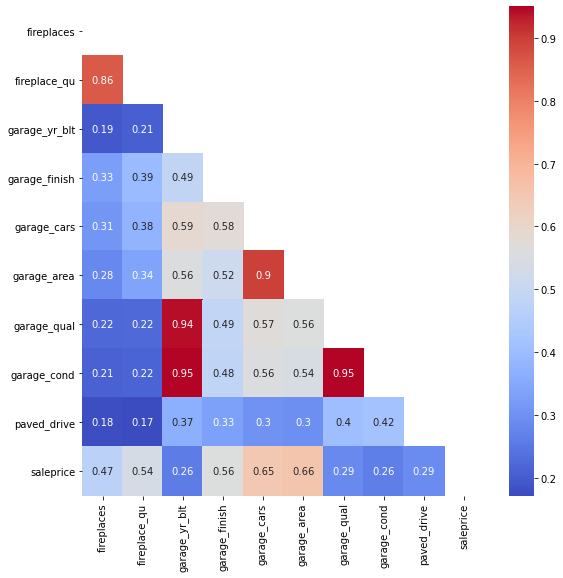

In [562]:
corr_heatmap(55, 65)

- fireplace_qu, garage_finish, garage_cars, garage_area are highly correlated.
- Now garage_cars and garage_area is mutually correlated as the number of cars that can be parked in a garage is directly dependent on the area of the garage.

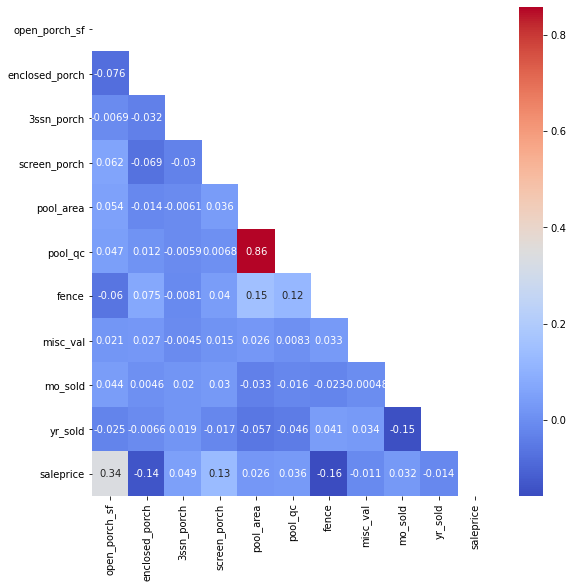

In [563]:
corr_heatmap(66, 78)

Not any specific correlation that we would like to emphasize on.

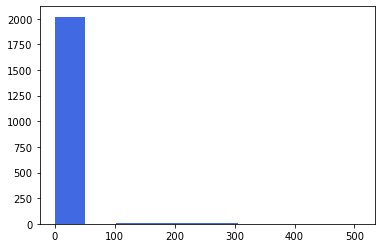

In [564]:
plt.hist(housing['3ssn_porch'], color='royalblue');

- There are only 26 houses that have 3 Season porch(3ssn_porch) area. here also the distribution is very skewed, so we will drop this column as well.

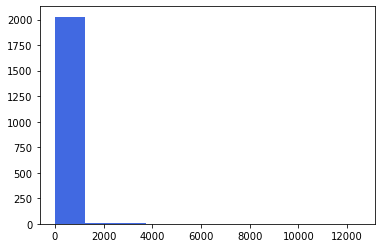

In [565]:
plt.hist(housing['misc_val'], color='royalblue');

- misc_val have less than 5 rows which has value between 1750-200. We will drop this column as well

Dropping all the columns that we discussed

In [566]:
housing.drop('utilities', axis = 1, inplace = True)
housing.drop('bsmtfin_sf_2', axis = 1, inplace = True)
housing.drop('low_qual_fin_sf', axis = 1, inplace = True)
housing.drop('misc_val', axis = 1, inplace = True)
housing.drop('3ssn_porch', axis = 1, inplace = True)

The rest of the nominal columns we will eliminate using lasso regression.

## Feature Preprocessing

### One Hot Encoding

Before we start modelling it is very important to convert the Nominal fields to dummies (0 & 1) as we cannot provide text values.

In [567]:
housing.head()

,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,house_age,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,mo_sold,yr_sold,sale_type,saleprice
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
109,60,RL,68.0,13517,Pave,NA,3,Lvl,CulDSac,4,Sawyer,RRAe,Norm,1Fam,2Story,6,8,45,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,4,3,CBlock,3,3,1,6,533.0,1,192.0,725.0,GasA,5,Y,5,725,754,1479,0.0,0.0,2,1,3,1,4,6,7,0,0,Attchd,1976.0,2,2.0,475.0,3,3,3,0,44,0,0,0,0,0,NA,3,2010,WD,130500
544,60,RL,43.0,11492,Pave,NA,3,Lvl,CulDSac,4,SawyerW,Norm,Norm,1Fam,2Story,7,5,25,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,4,3,PConc,4,3,1,6,637.0,1,276.0,913.0,GasA,5,Y,5,913,1209,2122,1.0,0.0,2,1,4,1,4,8,7,1,3,Attchd,1997.0,2,2.0,559.0,3,3,3,0,74,0,0,0,0,0,NA,4,2009,WD,220000
153,20,RL,68.0,7922,Pave,NA,4,Lvl,Inside,4,NAmes,Norm,Norm,1Fam,1Story,5,7,68,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,4,CBlock,3,3,1,6,731.0,1,326.0,1057.0,GasA,3,Y,5,1057,0,1057,1.0,0.0,1,0,3,1,4,5,7,0,0,Detchd,1953.0,1,1.0,246.0,3,3,3,0,52,0,0,0,0,0,NA,1,2010,WD,109000
318,60,RL,73.0,9802,Pave,NA,4,Lvl,Inside,4,Timber,Norm,Norm,1Fam,2Story,5,5,15,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,PConc,4,3,1,1,0.0,1,384.0,384.0,GasA,4,Y,5,744,700,1444,0.0,0.0,2,1,3,1,3,7,7,0,0,BuiltIn,2007.0,3,2.0,400.0,3,3,3,100,0,0,0,0,0,0,NA,4,2010,WD,174000
255,50,RL,82.0,14235,Pave,NA,3,Lvl,Inside,4,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,121,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,3,3,PConc,2,4,1,1,0.0,1,676.0,676.0,GasA,3,Y,5,831,614,1445,0.0,0.0,2,0,3,1,3,6,7,0,0,Detchd,1957.0,1,2.0,484.0,3,3,1,0,59,0,0,0,0,0,NA,3,2010,WD,138500


In [568]:
nominal_columns

['ms_subclass',
 'ms_zoning',
 'street',
 'alley',
 'land_contour',
 'lot_config',
 'neighborhood',
 'condition_1',
 'condition_2',
 'bldg_type',
 'house_style',
 'roof_style',
 'roof_matl',
 'exterior_1st',
 'exterior_2nd',
 'mas_vnr_type',
 'foundation',
 'heating',
 'central_air',
 'garage_type',
 'misc_feature',
 'sale_type']

In [569]:
def encode_concat(df, columns_to_encode):
    '''
    This method creates dummy columns for all nominal fields, 
    concat it to the original dataframe and drop the original nominal columns.
    '''
    dummies = pd.get_dummies(df[columns_to_encode])
    dummies_nona = [d for d in dummies.columns if not 'NA' in d]
    df_concat = pd.concat([df, dummies[dummies_nona]], axis = 1)
    df_concat.drop(columns_to_encode, axis = 1, inplace = True)
    return df_concat

In [570]:
housing_updated = encode_concat(housing, nominal_columns)

In [571]:
housing_updated.head()

,lot_frontage,lot_area,lot_shape,land_slope,overall_qual,overall_cond,house_age,year_remod/add,mas_vnr_area,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmt_unf_sf,total_bsmt_sf,heating_qc,electrical,1st_flr_sf,2nd_flr_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,...,exterior_2nd_Stucco,exterior_2nd_VinylSd,exterior_2nd_Wd Sdng,exterior_2nd_Wd Shng,mas_vnr_type_BrkCmn,mas_vnr_type_BrkFace,mas_vnr_type_None,mas_vnr_type_Stone,foundation_BrkTil,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,heating_GasA,heating_GasW,heating_Grav,heating_OthW,heating_Wall,central_air_N,central_air_Y,garage_type_2Types,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,misc_feature_Gar2,misc_feature_Othr,misc_feature_Shed,misc_feature_TenC,sale_type_COD,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_WD
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
109,68.0,13517,3,4,6,8,45,2005,289.0,4,3,3,3,1,6,533.0,1,192.0,725.0,5,5,725,754,1479,0.0,0.0,2,1,3,1,4,6,7,0,0,1976.0,2,2.0,475.0,3,...,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
544,43.0,11492,3,4,7,5,25,1997,132.0,4,3,4,3,1,6,637.0,1,276.0,913.0,5,5,913,1209,2122,1.0,0.0,2,1,4,1,4,8,7,1,3,1997.0,2,2.0,559.0,3,...,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
153,68.0,7922,4,4,5,7,68,2007,0.0,3,4,3,3,1,6,731.0,1,326.0,1057.0,3,5,1057,0,1057,1.0,0.0,1,0,3,1,4,5,7,0,0,1953.0,1,1.0,246.0,3,...,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
318,73.0,9802,4,4,5,5,15,2007,0.0,3,3,4,3,1,1,0.0,1,384.0,384.0,4,5,744,700,1444,0.0,0.0,2,1,3,1,3,7,7,0,0,2007.0,3,2.0,400.0,3,...,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
255,82.0,14235,3,4,6,8,121,1993,0.0,3,3,2,4,1,1,0.0,1,676.0,676.0,3,5,831,614,1445,0.0,0.0,2,0,3,1,3,6,7,0,0,1957.0,1,2.0,484.0,3,...,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [572]:
housing_updated.columns

Index(['lot_frontage', 'lot_area', 'lot_shape', 'land_slope', 'overall_qual',
       'overall_cond', 'house_age', 'year_remod/add', 'mas_vnr_area',
       'exter_qual',
       ...
       'misc_feature_TenC', 'sale_type_COD', 'sale_type_CWD', 'sale_type_Con',
       'sale_type_ConLD', 'sale_type_ConLI', 'sale_type_ConLw',
       'sale_type_New', 'sale_type_Oth', 'sale_type_WD '],
      dtype='object', length=222)

Exporting the updated training data to csv file for further model evaluation.

In [573]:
housing_updated.to_csv('../datasets/housing_train_cleaned.csv')